In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [5]:
data = load_breast_cancer()

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))


In [6]:
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [7]:
print(df.shape)

(569, 31)


In [8]:
print(df.shape)

(569, 31)


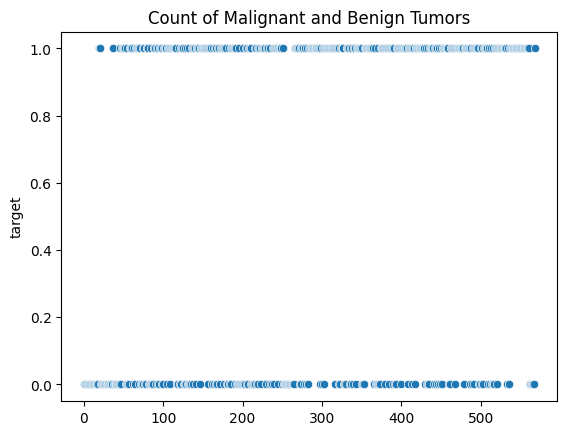

In [22]:
sns.scatterplot(df['target'])
plt.title('Count of Malignant and Benign Tumors')
plt.show()

In [10]:
# Get the absolute correlation values between features and target
corr_matrix = df.corr().round(2)
corr_values = abs(corr_matrix['target'])

In [12]:
best_features = corr_values.sort_values(ascending=False)[:10].index.tolist()


In [13]:
print(best_features)


['target', 'worst concave points', 'mean concave points', 'worst perimeter', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area', 'mean concavity']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[best_features], df['target'], test_size=0.2, random_state=0)


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)

In [16]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [17]:
y_pred = knn.predict(X_test)


In [18]:
y_pred = knn.predict(X_test)


In [19]:
cv_scores = cross_val_score(knn, df[best_features], df['target'], cv=10)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))

Cross-validation scores: [0.9122807  0.85964912 0.89473684 0.96491228 0.92982456 0.92982456
 0.96491228 0.9122807  0.9122807  0.98214286]
Mean cross-validation score: 0.9262844611528822


In [20]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Confusion matrix:', cm)
print('Accuracy:', accuracy)

Confusion matrix: [[44  3]
 [ 4 63]]
Accuracy: 0.9385964912280702


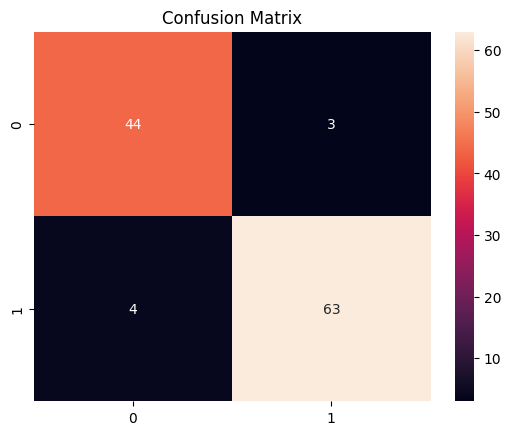

In [21]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.show()